# Procesamiento de los datos Fine-Tuning (TensorFlow)


### 1. ¿Qué es el modelo `bert-base-uncased`?

Para entenderlo, lo mejor es descomponer su nombre: **BERT** - **base** - **uncased**.

#### **BERT**: Bidirectional Encoder Representations from Transformers
Es el nombre de la arquitectura. Fue un modelo revolucionario creado por Google en 2018. Su principal innovación fue ser **bidireccional**, lo que significa que, para entender el significado de una palabra, el modelo no solo mira las palabras que vienen antes (de izquierda a derecha), sino también las que vienen después (de derecha a izquierda) en la misma oración. Esto le permite captar el contexto de una manera mucho más profunda. Está basado en la arquitectura **Transformer**.

#### **base**: El tamaño del modelo
Esto se refiere a la "escala" o tamaño de la arquitectura del modelo. La familia BERT se lanzó principalmente en dos tamaños:
*   **`base`**: Un modelo más pequeño y rápido.
    *   12 capas de Transformer.
    *   768 dimensiones ocultas.
    *   12 "cabezas de atención" (mecanismos de atención).
    *   Aproximadamente 110 millones de parámetros.
*   **`large`**: Un modelo más grande, potente y computacionalmente más costoso.
    *   24 capas de Transformer.
    *   1024 dimensiones ocultas.
    *   16 "cabezas de atención".
    *   Aproximadamente 340 millones de parámetros.

El modelo `base` es un excelente punto de partida porque ofrece un buen equilibrio entre rendimiento y recursos computacionales necesarios para entrenarlo y usarlo.

#### **uncased**: Manejo de mayúsculas y minúsculas
Esto indica cómo se preprocesó el texto con el que fue entrenado el modelo.
*   **`uncased` (sin mayúsculas)**: Todo el texto de entrenamiento fue convertido a minúsculas antes de ser tokenizado (dividido en palabras o sub-palabras). Además, se eliminaron los acentos. Esto significa que el modelo no distingue entre "Hola", "hola" y "HOLA". Las trata a todas como la misma palabra.
*   **`cased` (con mayúsculas)**: El modelo fue entrenado con el texto original, conservando la diferencia entre mayúsculas y minúsculas. El modelo sí distingue entre "Casa" (edificio) y "casa" (del verbo casar, en algunos contextos).

**En resumen, `bert-base-uncased` es la versión de tamaño "base" del modelo BERT, que fue entrenada con texto en inglés convertido completamente a minúsculas.**

---

### 2. ¿Cómo se comparan los modelos de BERT?

Los modelos de la familia BERT se comparan y diferencian según varios criterios clave. No hay un "mejor" modelo en abstracto; la elección depende de la tarea, el idioma y los recursos disponibles.

Aquí están los principales ejes de comparación:

#### a) Tamaño (`base` vs. `large`)
Como vimos antes, esta es la diferencia principal en la capacidad del modelo.

| Característica | `BERT-base` | `BERT-large` |
| :--- | :--- | :--- |
| **Capas** | 12 | 24 |
| **Parámetros** | ~110 Millones | ~340 Millones |
| **Rendimiento** | Muy bueno | Ligeramente superior (1-3% en benchmarks) |
| **Coste Computacional**| Moderado | Alto (requiere más VRAM, tiempo de inferencia y entrenamiento) |

**¿Cuándo usar cuál?**
*   **`base`**: Ideal para la mayoría de las aplicaciones, prototipado rápido y entornos con recursos limitados.
*   **`large`**: Cuando se necesita el máximo rendimiento posible y se dispone del hardware necesario (GPUs potentes).

#### b) Manejo de Mayúsculas (`cased` vs. `uncased`)
La elección depende de si las mayúsculas aportan información semántica relevante para tu tarea.

*   **`uncased`**:
    *   **Ventaja**: Más simple y robusto si las mayúsculas no son importantes (ej. análisis de sentimientos, clasificación general de texto). El vocabulario es más pequeño.
    *   **Desventaja**: Pierde información. No puede diferenciar entre "Apple" (la empresa) y "apple" (la fruta) basándose solo en la capitalización.

*   **`cased`**:
    *   **Ventaja**: Conserva información útil para tareas como **Reconocimiento de Entidades Nombradas (NER)**, donde las mayúsculas son clave para identificar nombres propios, marcas o lugares.
    *   **Desventaja**: El vocabulario es más grande, lo que puede hacerlo ligeramente más lento y propenso a errores si el texto de entrada no es gramaticalmente perfecto.

#### c) Idioma
BERT no es solo para inglés. Existen modelos pre-entrenados para muchos idiomas.

*   **Monolingües**: Entrenados con un corpus masivo de un solo idioma.
    *   `bert-base-uncased` (Inglés)
    *   `dccuchile/bert-base-spanish-wwm-uncased` o `BETO` (Español)
    *   `bert-base-german-cased` (Alemán)
*   **Multilingües**: Entrenados con un corpus que mezcla textos de muchos idiomas (generalmente Wikipedia).
    *   `bert-base-multilingual-cased` (mBERT): Entrenado en 104 idiomas. Es sorprendentemente bueno para tareas en múltiples idiomas, especialmente en "zero-shot cross-lingual transfer" (entrenar en un idioma y probar en otro).

#### d) Dominio de entrenamiento
El BERT original fue entrenado con Wikipedia y BookCorpus (un corpus de libros). Sin embargo, han surgido versiones especializadas entrenadas en textos de dominios específicos para mejorar el rendimiento en esas áreas.

*   **BioBERT**: Entrenado con textos biomédicos (ej. artículos de PubMed).
*   **SciBERT**: Entrenado en textos científicos de informática y biomedicina.
*   **FinBERT**: Entrenado en textos financieros para análisis de sentimientos en noticias económicas.

#### e) Tarea Específica (Fine-Tuning)
Un modelo pre-entrenado como `bert-base-uncased` es solo una base. Su verdadero poder se desata cuando se realiza un **fine-tuning** (ajuste fino) para una tarea específica (clasificación, respuesta a preguntas, etc.) usando un conjunto de datos etiquetado para esa tarea.

Por lo tanto, una comparación final sería entre "BERT ajustado para análisis de sentimiento" vs. "BERT ajustado para resumen de texto".

### Tabla Resumen de Comparación

| Característica | `bert-base-uncased` | `bert-large-cased` | `bert-base-multilingual-cased` | `BETO (Español)` |
| :--- | :--- | :--- | :--- | :--- |
| **Tamaño** | Base (~110M) | Grande (~340M) | Base (~177M) | Base (~110M) |
| **Mayúsculas** | No (uncased) | Sí (cased) | Sí (cased) | Uncased o Cased |
| **Idioma(s)** | Inglés | Inglés | 104 idiomas | Español |
| **Caso de Uso** | Tareas generales en inglés, análisis de sentimiento. | Tareas de alto rendimiento en inglés, NER. | Tareas multilingües, clasificación en idiomas con pocos recursos. | Tareas en español. |

En conclusión, **`bert-base-uncased` es un pilar fundamental**, pero la elección del modelo BERT correcto es una decisión estratégica que depende de un balance entre la precisión deseada, los recursos computacionales, el idioma y la especificidad de la tarea.

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

In [ ]:
!pip list | grep -E 'transformers|datasets|evaluate'

In [1]:
import tensorflow as tf
import numpy as np
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

#
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I have been studying hard for the master's degree in data science.",
    "These Transformers courses are great!",
]
batch = dict(tokenizer(sequences, padding=True, truncation=True, return_tensors="tf"))

#
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
labels = tf.convert_to_tensor([1, 1])
model.train_on_batch(batch, labels)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0.6931471824645996

#Ejemplo mínimo de cómo se realiza el **fine-tuning** (ajuste fino) de un modelo Transformer como BERT.

Vamos a explicarlo paso a paso, bloque por bloque.

### Resumen General

En una sola frase: este código toma un modelo BERT pre-entrenado, le muestra dos frases de ejemplo y realiza **un único paso de entrenamiento** para enseñarle que ambas frases pertenecen a la "clase 1". Es una demostración de la mecánica del entrenamiento, no un entrenamiento completo.


### Explicación Detallada del Código

#### 1. Importación de Librerías
```python
import tensorflow as tf
import numpy as np
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
```
*   `tensorflow as tf`: Se importa la librería principal de deep learning de Google. El código está escrito para el backend de TensorFlow.
*   `numpy as np`: Una librería fundamental para el cómputo numérico en Python. Aunque no se usa directamente en este fragmento, es casi siempre necesaria en proyectos de machine learning.
*   `from transformers import ...`: Aquí se importa lo esencial de la librería de Hugging Face.
    *   `AutoTokenizer`: Una clase mágica que puede descargar y cargar automáticamente el **tokenizador** correcto asociado a cualquier modelo. Un tokenizador es el responsable de convertir texto (strings) en números (IDs de tokens) que el modelo pueda entender.
    *   `TFAutoModelForSequenceClassification`: Otra clase automática que descarga y carga la arquitectura de un modelo pre-entrenado, pero con una adición clave: una **cabeza de clasificación de secuencias** encima. La "TF" al inicio indica que es la versión para TensorFlow.

#### 2. Carga del Modelo y Tokenizador
```python
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
```
*   `checkpoint = "bert-base-uncased"`: Se define el identificador del modelo que queremos usar. Como vimos antes, es la versión base de BERT, en inglés y sin distinguir mayúsculas/minúsculas.
*   `tokenizer = AutoTokenizer.from_pretrained(checkpoint)`: Se descarga (si no está en caché) y se carga el tokenizador que fue usado para entrenar `bert-base-uncased`. **Es crucial usar el mismo tokenizador que el modelo**, ya que cada modelo tiene su propio vocabulario.
*   `model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)`: Se descarga (si no está en caché) el modelo pre-entrenado. Ocurren dos cosas importantes aquí:
    1.  Se cargan los pesos ya entrenados del cuerpo principal de BERT (sus 110 millones de parámetros).
    2.  Se añade una capa de clasificación (la "cabeza") al final. Esta capa es nueva y sus pesos se inicializan de forma **aleatoria**. Por lo tanto, antes del entrenamiento, el modelo no sabe nada sobre la tarea de clasificación y sus predicciones serán al azar.

#### 3. Preparación de los Datos
```python
sequences = [
    "I have been studying hard for the master's degree in data science.",
    "These Transformers courses are great!",
]
batch = dict(tokenizer(sequences, padding=True, truncation=True, return_tensors="tf"))
```
*   `sequences = [...]`: Se definen las frases de ejemplo que usaremos para entrenar.
*   `tokenizer(...)`: Aquí se usa el tokenizador para procesar las frases.
    *   `padding=True`: Las dos frases tienen longitudes diferentes. El `padding` añade tokens especiales `[PAD]` a la frase más corta para que ambas tengan la misma longitud en el lote (batch). Esto es necesario para que los datos puedan ser procesados como un tensor rectangular.
    *   `truncation=True`: Si una frase fuera más larga que el máximo que BERT puede manejar (512 tokens), se cortaría.
    *   `return_tensors="tf"`: Le dice al tokenizador que devuelva los datos como tensores de TensorFlow (`tf.Tensor`), que es el formato que nuestro modelo necesita.
*   `batch = dict(...)`: La salida del tokenizador es un diccionario que contiene, como mínimo:
    *   `input_ids`: Los IDs numéricos de los tokens de cada frase.
    *   `attention_mask`: Una máscara binaria (de 0s y 1s) que le dice al modelo qué tokens son reales y cuáles son de `padding`, para que el modelo ignore estos últimos.

#### 4. Configuración y Ejecución del Entrenamiento
```python
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
labels = tf.convert_to_tensor([1, 1])
model.train_on_batch(batch, labels)
```
Este es el corazón del ajuste fino.

*   `model.compile(...)`: Este es un paso estándar en Keras/TensorFlow para preparar el modelo para el entrenamiento.
    *   `optimizer="adam"`: Se elige el **optimizador**, que es el algoritmo que se usará para actualizar los pesos del modelo para minimizar el error. "Adam" es una opción muy popular y robusta.
    *   `loss="sparse_categorical_crossentropy"`: Se define la **función de pérdida**. Esta función mide qué tan "malas" son las predicciones del modelo en comparación con las etiquetas verdaderas. `sparse_categorical_crossentropy` se usa para problemas de clasificación cuando las etiquetas son números enteros (como 0, 1, 2...).

*   `labels = tf.convert_to_tensor([1, 1])`: Aquí creamos las **etiquetas verdaderas** (ground truth). Le estamos diciendo al modelo que la primera frase (`"I have been studying..."`) pertenece a la clase `1` y que la segunda frase (`"These Transformers..."`) también pertenece a la clase `1`.

*   `model.train_on_batch(batch, labels)`: Esta es la acción final. Ejecuta **un solo paso de entrenamiento** con el lote de datos que preparamos. Lo que sucede internamente es el ciclo completo del aprendizaje:
    1.  **Pase hacia adelante (Forward Pass)**: El `batch` de datos se introduce en el modelo y este genera una predicción.
    2.  **Cálculo de la Pérdida (Loss Calculation)**: La función `sparse_categorical_crossentropy` compara la predicción del modelo con las `labels` (`[1, 1]`) y calcula un número que representa el error.
    3.  **Pase hacia atrás (Backward Pass / Backpropagation)**: El error se propaga hacia atrás a través de todas las capas del modelo para calcular cómo cada peso contribuyó al error total.
    4.  **Actualización de Pesos (Weight Update)**: El optimizador `adam` usa esta información para ajustar ligeramente todos los pesos del modelo (tanto los del cuerpo de BERT como los de la nueva cabeza de clasificación) en una dirección que debería reducir el error si volviera a ver los mismos datos.

### Conclusión y ¿Qué Pasa Después?

Después de ejecutar `model.train_on_batch`, los pesos del modelo han cambiado. Ahora está *un poquito* mejor preparado para clasificar esas dos frases (y frases similares) como pertenecientes a la clase `1`.

En un escenario real, nunca se entrena con un solo paso. Se haría lo siguiente:
1.  Se usaría un conjunto de datos mucho más grande (cientos o miles de ejemplos).
2.  Se dividiría en lotes (batches) más pequeños.
3.  Se iteraría sobre todos los lotes varias veces (lo que se conoce como **épocas** o *epochs*).
4.  Se usaría un conjunto de datos de validación para evaluar el rendimiento del modelo y evitar el sobreajuste (overfitting).

# Libreria datasets de Hugging Face

En una sola frase: este código utiliza la librería `datasets` de Hugging Face para descargar y cargar un famoso conjunto de datos llamado **MRPC** (Microsoft Research Paraphrase Corpus), que forma parte de una colección de benchmarks más grande llamada **GLUE**.


### Explicación Detallada

#### 1. Importación de la Librería
```python
from datasets import load_dataset
```
*   `datasets`: Esta es una librería de Hugging Face increíblemente útil. Está diseñada para facilitar la descarga, el preprocesamiento, el almacenamiento en caché y la manipulación de grandes conjuntos de datos de PLN de manera eficiente.
*   `load_dataset`: Es la función principal de esta librería. Actúa como un punto de entrada centralizado para acceder a miles de datasets alojados en el [Hugging Face Hub](https://huggingface.co/datasets).

#### 2. Carga del Dataset
```python
raw_datasets = load_dataset("glue", "mrpc")
```
Aquí es donde ocurre la magia. La función `load_dataset` toma (como mínimo) uno o dos argumentos:

*   **Primer argumento (`"glue"`)**: Es el nombre de la **colección** del conjunto de datos. **GLUE** (General Language Understanding Evaluation) es un conjunto de nueve tareas diferentes diseñadas para evaluar la comprensión del lenguaje de los modelos. Es uno de los benchmarks más famosos en PLN.
*   **Segundo argumento (`"mrpc"`)**: Es el nombre de la **tarea** o **subconjunto** específico dentro de la colección GLUE. **MRPC** significa **Microsoft Research Paraphrase Corpus**. Este dataset está diseñado para una tarea muy específica: **detección de paráfrasis**.

**¿Qué es la detección de paráfrasis?**
Es una tarea de clasificación binaria. A un modelo se le dan dos oraciones y debe decidir si ambas significan lo mismo (son paráfrasis la una de la otra) o no.
*   **Etiqueta 0**: Las oraciones no son paráfrasis.
*   **Etiqueta 1**: Las oraciones son paráfrasis.

**¿Qué hace `load_dataset` internamente?**
1.  Busca en el Hugging Face Hub el dataset "glue" y su configuración "mrpc".
2.  Si no lo tienes descargado, lo **descarga** y lo guarda en una carpeta de caché en tu disco duro (normalmente en `~/.cache/huggingface/datasets`). La próxima vez que ejecutes el código, lo cargará directamente desde la caché, lo cual es mucho más rápido.
3.  Carga los datos en una estructura de datos optimizada llamada `DatasetDict`.

#### 3. Inspección del Objeto Cargado
```python
raw_datasets
```
Cuando ejecutas esta línea en un notebook (como Jupyter o Google Colab), obtienes una representación visual muy informativa del objeto que se ha cargado. La salida se verá más o menos así:

```
DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})
```

Vamos a desglosar esta salida:

*   `DatasetDict`: Es el objeto principal. Es como un diccionario de Python donde las claves son los nombres de las divisiones del dataset (`train`, `validation`, `test`) y los valores son los datasets en sí.
    *   **`train`**: El conjunto de entrenamiento. Se utiliza para el `fine-tuning` del modelo. Contiene 3668 pares de oraciones.
    *   **`validation`**: El conjunto de validación. Se usa durante el entrenamiento para evaluar el rendimiento del modelo en datos que no ha visto y para ajustar hiperparámetros. Contiene 408 pares.
    *   **`test`**: El conjunto de prueba. Se utiliza para la evaluación final del modelo una vez que el entrenamiento ha concluido. Contiene 1725 pares.

*   `Dataset`: Cada una de las divisiones es un objeto `Dataset`. La información que muestra es clave:
    *   **`features`**: Describe las columnas de cada registro en el dataset. Para MRPC, son:
        *   `sentence1`: La primera oración del par.
        *   `sentence2`: La segunda oración del par.
        *   `label`: La etiqueta que indica si son paráfrasis (0 o 1).
        *   `idx`: Un índice único para cada ejemplo.
    *   **`num_rows`**: El número de ejemplos (filas) en esa división del dataset.

### En Resumen y Contexto

Este simple fragmento de código es el punto de partida para cualquier proyecto de `fine-tuning`. Al cargar `raw_datasets`, has obtenido los datos necesarios para:

1.  **Entrenar tu modelo**: Usando `raw_datasets['train']`.
2.  **Evaluarlo durante el entrenamiento**: Usando `raw_datasets['validation']`.
3.  **Probar su rendimiento final**: Usando `raw_datasets['test']`.

El siguiente paso, después de este código, sería usar el `tokenizer` (como el del ejemplo anterior) para convertir las columnas `sentence1` y `sentence2` en `input_ids` y `attention_mask` que el modelo BERT pueda entender.

In [3]:
import datasets
print(datasets.__version__)

2.14.4


Si estás utilizando la versión 2.14.4  o menor de la biblioteca datasets. Puede haber un problema conocido con esta versión. recomiendo actualizar la biblioteca datasets a la última versión.

<font color="red"> Debe reiniciar la sesión </font>

In [4]:
!pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [1]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/649k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/75.7k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/308k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})


### Verificación de los datos

En este código primero **selecciona exclusivamente el conjunto de datos de entrenamiento** de la colección que carga y luego **muestra el primer ejemplo individual** de ese conjunto de entrenamiento.

### Explicación Detallada

#### 1. Selección del Conjunto de Entrenamiento
```python
raw_train_dataset = raw_datasets["train"]
```
*   **Contexto**: Recuerda que `raw_datasets` es un objeto `DatasetDict`, que se comporta como un diccionario de Python. Contiene las claves `"train"`, `"validation"` y `"test"`.

*   **Acción**: Esta línea de código accede al valor asociado con la clave `"train"`. Es decir, está extrayendo el objeto `Dataset` que contiene todos los datos de entrenamiento.

*   **Propósito**: Se guarda este subconjunto en una nueva variable, `raw_train_dataset`. Esto es una práctica común para hacer el código más legible. Ahora, en lugar de escribir `raw_datasets["train"]` cada vez que quieras referirte a los datos de entrenamiento, puedes simplemente usar la variable más corta `raw_train_dataset`.

#### 2. Inspección del Primer Ejemplo
```python
raw_train_dataset[0]
```
*   **Contexto**: El objeto `raw_train_dataset` (de tipo `Dataset`) se comporta de manera muy similar a una lista de Python. Puedes acceder a sus elementos utilizando un índice numérico.

*   **Acción**: Al usar `[0]`, estás pidiendo el elemento en la primera posición (el índice 0) del conjunto de entrenamiento.

*   **Propósito**: Este es uno de los pasos más importantes y comunes al trabajar con un nuevo dataset. Te permite:
    1.  **Entender la estructura de los datos**: Ver cómo se ve un único punto de datos.
    2.  **Verificar la carga**: Asegurarte de que los datos se cargaron correctamente.
    3.  **Hacer una comprobación de sentido común (sanity check)**: Como humano, puedes leer las dos oraciones y ver si la etiqueta tiene sentido.

### La Salida Esperada

Cuando ejecutes `raw_train_dataset[0]`, la salida será un diccionario de Python que representa la primera fila de la tabla de datos de entrenamiento. Se verá exactamente así:

```python
{
  'sentence1': 'Amrozi accused his brother, whom he called "the witness", of deliberately distorting his evidence.',
  'sentence2': 'Referring to him as only "the witness", Amrozi accused his brother of deliberately distorting his evidence.',
  'label': 1,
  'idx': 0
}
```

**Análisis de la Salida:**

*   `'sentence1'`: La primera oración del par.
    > "Amrozi acusó a su hermano, a quien llamó "el testigo", de distorsionar deliberadamente su testimonio."
*   `'sentence2'`: La segunda oración del par.
    > "Refiriéndose a él sólo como "el testigo", Amrozi acusó a su hermano de distorsionar deliberadamente su testimonio."
*   `'label'`: La etiqueta de verdad (ground truth). En este caso es `1`.
    *   `1` significa que las oraciones **son paráfrasis** (significan lo mismo).
    *   `0` significaría que **no son paráfrasis**.
    *   En este ejemplo, podemos ver claramente que las dos frases, aunque escritas de forma diferente, transmiten la misma idea. La etiqueta `1` es correcta.
*   `'idx'`: El índice del ejemplo, que es `0`.

### ¿Por qué es esto importante para el siguiente paso?

Este diccionario es la "materia prima". El siguiente paso en un flujo de trabajo de fine-tuning será tomar diccionarios como este y usar un `tokenizer` para procesar los campos de texto (`sentence1` y `sentence2`) y convertirlos en `input_ids` numéricos que el modelo BERT pueda entender. La `label` se usará como la respuesta correcta que el modelo debe aprender a predecir.

In [5]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

In [3]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

Este es demuestra cómo funciona el **tokenizador** de Hugging Face.

En resumen, este código carga el tokenizador de `bert-base-uncased` y lo utiliza para convertir **por separado** todas las oraciones de la columna `sentence1` y todas las de la columna `sentence2` en representaciones numéricas (tokens).

<font color="red">Aunque esto funciona técnicamente, no es el enfoque correcto para una tarea de clasificación de pares de oraciones como MRPC. </font>


### Explicación Detallada del Código

#### 1. Carga del Tokenizador (Repaso)
```python
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
```

#### 2. Tokenización de la Primera Columna de Oraciones
```python
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
```
Aquí está la parte interesante. Vamos a analizarla de adentro hacia afuera:
*   `raw_datasets["train"]`: Seleccionamos el conjunto de entrenamiento.
*   `["sentence1"]`: De ese conjunto, extraemos **toda la columna `sentence1`**. Esto no es una sola oración, sino una lista que contiene las 3,668 oraciones de la primera columna del set de entrenamiento.
*   `tokenizer(...)`: El tokenizador de Hugging Face es muy eficiente y puede procesar una lista completa de textos de una sola vez. Lo que hace es:
    1.  Tomar cada oración de la lista.
    2.  Dividirla en tokens según el vocabulario de `bert-base-uncased`.
    3.  Convertir cada token a su ID numérico correspondiente.
    4.  Añadir los tokens especiales que BERT necesita, como `[CLS]` al principio y `[SEP]` al final.

#### 3. Tokenización de la Segunda Columna de Oraciones
```python
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])
```

### ¿Qué contienen `tokenized_sentences_1` y `tokenized_sentences_2`?

Si inspecciona `tokenized_sentences_1` (o la 2), no verá una simple lista de números. Verá un objeto especial (un `BatchEncoding`) que se comporta como un diccionario con varias claves:

*   **`input_ids`**: Esta es la clave más importante. Es una **lista de listas**. Cada lista interna contiene los IDs numéricos de una oración tokenizada. Como no se especificó `padding`, cada lista interna tendrá una longitud diferente.
    ```
    # Ejemplo conceptual de tokenized_sentences_1['input_ids']
    [
      [101, 2292, 12831, ..., 102],  # Oración 1 tokenizada
      [101, 2023, 2003, ..., 102],  # Oración 2 tokenizada
      ...
      # 3668 listas en total
    ]

*   **`token_type_ids`**: Para la tokenización de una sola oración, esto será una lista de listas llenas de ceros. Esta clave es más importante cuando se tokenizan pares de oraciones.
*   **`attention_mask`**: Una lista de listas de unos. Indica al modelo que preste atención a todos los tokens, ya que (por ahora) no hay padding.

### El Problema Fundamental de este Enfoque

**La tarea de MRPC es comparar `sentence1` y `sentence2` para ver si son paráfrasis.**

BERT está diseñado para manejar pares de oraciones de una manera muy específica. Espera recibirlas **juntas** en una sola secuencia, separadas por un token especial `[SEP]`. El formato correcto es:

`[CLS]  sentence1  [SEP]  sentence2  [SEP]`

Al tokenizar las columnas por separado como en el código de ejemplo:

```python
# Lo que hace el código
tokenized_1 = [CLS] sentence1 [SEP]
tokenized_2 = [CLS] sentence2 [SEP]
```

In [6]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

In [9]:
inputs = tokenizer("I have been studying hard for the master's degree in data science.", "These Transformers courses are great!")
inputs

{'input_ids': [101, 1045, 2031, 2042, 5702, 2524, 2005, 1996, 3040, 1005, 1055, 3014, 1999, 2951, 2671, 1012, 102, 2122, 19081, 5352, 2024, 2307, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


### `tokenizer.convert_ids_to_tokens(inputs["input_ids"])` - El "Traductor Inverso"

Esta línea de código es una herramienta de **depuración y verificación**. No prepara los datos para el entrenamiento, sino que nos ayuda a entender lo que el tokenizador está haciendo.

**¿Qué hace?**
Es la operación inversa a la tokenización principal.
*   El `tokenizer` convierte texto (tokens) en números (`input_ids`).
*   `convert_ids_to_tokens` convierte números (`input_ids`) de vuelta a texto (tokens).

**Contexto:**
Para que esta línea funcione, la variable `inputs` debe existir. Asumamos que la creaste así:

```python
# Primero, tokenizamos UNA SOLA frase para tener un ejemplo
inputs = tokenizer("Hello, world!")
# La variable 'inputs' es un diccionario: {'input_ids': [101, 7592, 1010, 2088, 102], ...}

# Ahora podemos ejecutar tu línea de código
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"])
print(tokens)
```
La salida de esto sería:
```
['[CLS]', 'hello', ',', 'world', '[SEP]']
```

**Propósito y Utilidad:**
Es extremadamente útil para:
1.  **Verificar la tokenización**: ¿Cómo dividió el tokenizador una palabra compleja o una palabra que no conocía? Por ejemplo, "tokenization" podría convertirse en `['token', '##ization']`.
2.  **Entender el vocabulario**: Ves los tokens especiales (`[CLS]`, `[SEP]`, `[PAD]`) que el modelo utiliza.
3.  **Depurar errores**: Si el modelo se comporta de forma extraña, puedes comprobar exactamente qué "ve" el modelo después de la tokenización.

En resumen, `convert_ids_to_tokens` es tu lupa para inspeccionar el trabajo del tokenizador.


### tokenized_dataset = tokenizer(...)` - La Forma Correcta de Tokenizar Pares de Oraciones

Este es el código crucial que corrige el problema que mencionamos en la explicación anterior. Este es el método **correcto y estándar** para preparar datos para una tarea de clasificación de pares de oraciones (como MRPC, QNLI, etc.).

```python
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],  # Argumento 1: Lista de primeras oraciones
    raw_datasets["train"]["sentence2"],  # Argumento 2: Lista de segundas oraciones
    padding=True,
    truncation=True,
)
```

**Análisis Detallado:**

1.  **Dos Argumentos de Texto**: Lo más importante aquí es que le estás pasando **dos listas de oraciones** al tokenizador. El tokenizador de Hugging Face está programado para reconocer este patrón. Cuando recibe dos secuencias, sabe que debe combinarlas en el formato especial que BERT espera para tareas de pares de oraciones:
    `[CLS]  oración 1  [SEP]  oración 2  [SEP]`

2.  **`padding=True`**:
    *   **Problema**: Después de combinar los pares de oraciones, cada secuencia resultante tendrá una longitud diferente. Para procesar los datos en lotes (batches) de manera eficiente en una GPU, todos los elementos del lote deben tener exactamente la misma longitud.
    *   **Solución**: `padding=True` le dice al tokenizador que calcule la longitud de la secuencia más larga en todo el conjunto de datos y añada tokens especiales `[PAD]` al final de todas las secuencias más cortas para que todas alcancen esa longitud máxima.

3.  **`truncation=True`**:
    *   **Problema**: Los modelos como BERT tienen un límite máximo de longitud de secuencia que pueden procesar (para `bert-base-uncased`, es de 512 tokens). Si un par de oraciones combinado supera este límite, el programa lanzará un error.
    *   **Solución**: `truncation=True` le dice al tokenizador que corte (trunque) cualquier secuencia que exceda el límite máximo del modelo, asegurando que no haya errores.

### ¿Qué contiene ahora `tokenized_dataset`?

Este objeto es la versión final de tus datos, lista para el entrenamiento. Es un `BatchEncoding` (similar a un diccionario) que contiene toda la información que el modelo necesita. Si inspeccionas el primer elemento, contendrá estas claves cruciales:

*   **`input_ids`**: Una lista de IDs numéricos que representa el par de oraciones combinado.
    *   Ejemplo conceptual: `[101, 2292, ..., 102, 1709, ..., 102, 0, 0, 0]`
    *   Aquí `101` es `[CLS]`, `102` es `[SEP]` y `0` es `[PAD]`.

*   **`attention_mask`**: Una lista de 0s y 1s. Tiene la misma longitud que `input_ids`.
    *   `1` indica un token real (palabra o `[CLS]`/`[SEP]`) al que el modelo debe prestar atención.
    *   `0` indica un token de `padding` que el modelo debe ignorar.
    *   Ejemplo conceptual: `[1, 1, ..., 1, 1, ..., 1, 0, 0, 0]`

*   **`token_type_ids`**: ¡Esta es la clave para las tareas de pares! Es una lista de 0s y 1s que le dice al modelo qué parte de los `input_ids` pertenece a la primera oración y qué parte a la segunda.
    *   `0` se asigna a todos los tokens de la primera oración (incluyendo su `[CLS]` y `[SEP]`).
    *   `1` se asigna a todos los tokens de la segunda oración (incluyendo su `[SEP]`).
    *   Ejemplo conceptual: `[0, 0, ..., 0, 1, 1, ..., 1, 0, 0, 0]` (los últimos ceros corresponden al padding).

### Resumen Final

| Código | Propósito | ¿Cu

In [10]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]',
 'i',
 'have',
 'been',
 'studying',
 'hard',
 'for',
 'the',
 'master',
 "'",
 's',
 'degree',
 'in',
 'data',
 'science',
 '.',
 '[SEP]',
 'these',
 'transformers',
 'courses',
 'are',
 'great',
 '!',
 '[SEP]']

In [11]:
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
)

### 1. La Función de Tokenización: `tokenize_function`

```python
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)
```

*   **Definición de la función**: Se define una función llamada `tokenize_function`. Esta función está diseñada para operar sobre una porción (un "batch" o lote) del dataset.
*   **El argumento `example`**: Aunque el nombre es `example` (en singular), cuando se usa con `batched=True` (lo veremos en un momento), este argumento no es un solo ejemplo, sino un **diccionario que contiene lotes de datos**. Piénsalo así:
    *   `example["sentence1"]` no es una sola oración, sino una **lista de oraciones** de la columna `sentence1`.
    *   `example["sentence2"]` es, igualmente, una **lista de oraciones** de la columna `sentence2`.
*   **El cuerpo de la función**:
    *   `tokenizer(example["sentence1"], example["sentence2"], ...)`: Esto es exactamente lo que vimos en la explicación anterior. Se pasan las dos listas de oraciones al tokenizador para que las procese como pares.
    *   `truncation=True`: Se asegura de que ninguna secuencia exceda la longitud máxima del modelo.
    *   **Nota importante**: No se incluye `padding=True` aquí. Esto es una optimización. El padding se aplicará más tarde, justo antes de crear los lotes para el entrenamiento. Esto es más eficiente porque se rellena cada lote a la longitud máxima *de ese lote*, no a la longitud máxima de *todo el dataset*.
*   **El `return`**: La función devuelve el resultado del tokenizador. La librería `datasets` es lo suficientemente inteligente como para tomar este resultado (que es un diccionario con `input_ids`, `attention_mask`, etc.) y añadir estas nuevas columnas al dataset original.

### 2. El Método `.map()`: Aplicando la Función a Todo el Dataset

```python
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
```

*   `raw_datasets`: Este es nuestro `DatasetDict` original, que contiene las divisiones `train`, `validation` y `test`.
*   `.map()`: Este es un método increíblemente poderoso de la librería `datasets`. Su trabajo es aplicar una función a **cada uno de los ejemplos** del dataset de manera muy eficiente.
*   **Primer argumento (`tokenize_function`)**: Le estamos diciendo a `.map()` qué función debe ejecutar para cada ejemplo (o lote de ejemplos).
*   **Segundo argumento (`batched=True`)**: ¡Este es el secreto de la velocidad!
    *   Si fuera `False` (el valor por defecto), `.map()` llamaría a `tokenize_function` una vez por **cada fila** del dataset (3668 veces para el set de entrenamiento, una por una). Esto sería muy lento.
    *   Al establecer `batched=True`, le decimos a `.map()` que agrupe los ejemplos en lotes (batches, típicamente de 1000) y pase un lote entero a `tokenize_function` de una sola vez. Como el tokenizador de Hugging Face está altamente optimizado para procesar lotes, esto acelera el proceso de tokenización de manera drástica.

### 3. La Salida: `tokenized_datasets`

```python
tokenized_datasets
```
Cuando inspeccionas este nuevo objeto, verás una salida muy similar a la de `raw_datasets`, pero con una diferencia clave: **las nuevas columnas han sido añadidas**.

La salida se verá así:

```
DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})
```

**Análisis de la Salida:**

*   El objeto sigue siendo un `DatasetDict` con las mismas divisiones.
*   ¡Mira la lista de `features`! Además de las columnas originales (`sentence1`, `sentence2`, `label`, `idx`), ahora cada división tiene las columnas que el modelo necesita:
    *   `input_ids`
    *   `token_type_ids`
    *   `attention_mask`
*   El método `.map()` ha aplicado la `tokenize_function` a todas las divisiones (`train`, `validation`, y `test`) automáticamente.

### Resumen: ¿Por qué este método es el mejor?

1.  **Eficiencia**: `batched=True` aprovecha el procesamiento en lote del tokenizador, lo que lo hace órdenes de magnitud más rápido que iterar uno por uno.
2.  **Claridad y Organización**: El código es limpio. Separas la lógica de la tokenización en una función y luego la aplicas.
3.  **Escalabilidad**: Este método funciona igual de bien en un dataset pequeño como MRPC o en uno con millones de ejemplos, gracias a que la librería `datasets` utiliza técnicas eficientes de memoria (como el memory-mapping de Arrow).
4.  **Consistencia**: Aplica la misma transformación a todos los subconjuntos (`train`, `validation`, `test`), lo que garantiza que no haya discrepancias en el preprocesamiento.

Este es el flujo de trabajo estándar y recomendado para preprocesar datos en el ecosistema de Hugging Face.

In [12]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [13]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

### DataCollatorWithPadding

Este código hace tres cosas:
1.  Crea un "ensamblador de lotes inteligente" (`DataCollatorWithPadding`) que sabe cómo tomar una lista de ejemplos y convertirlos en un lote de tensores de TensorFlow, aplicando el relleno (padding) de forma dinámica.
2.  Extrae un pequeño subconjunto de 8 ejemplos del dataset de entrenamiento y lo limpia, quedándose solo con las columnas que el modelo necesita.
3.  Verifica y demuestra que estos 8 ejemplos, tal como están, tienen longitudes diferentes, lo que prueba la necesidad del `DataCollator`.



### Explicación Detallada

#### Parte 1: El `DataCollatorWithPadding`

```python
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
```

*   **¿Qué es un Data Collator?** Imagínalo como un "ensamblador de lotes" (batches). Su trabajo es tomar una lista de ejemplos individuales de tu dataset y agruparlos de manera inteligente en un solo lote que pueda ser procesado por el modelo.

*   **`DataCollatorWithPadding`**: Esta es una clase específica de `DataCollator`. Su superpoder es el **padding dinámico**.
    *   **Recuerda**: En el paso anterior con `.map()`, decidimos no aplicar el padding a todo el dataset. ¿Por qué? Porque habría rellenado cada ejemplo hasta la longitud del más largo de *todo el dataset*, lo que es muy ineficiente y consume mucha memoria.
    *   **Padding dinámico**: Este compaginador soluciona eso. Cuando le das un lote de, digamos, 8 ejemplos, encontrará el ejemplo más largo *dentro de ese lote* y rellenará los otros 7 solo hasta esa longitud. Esto es mucho más eficiente.

*   **Argumentos**:
    *   `tokenizer=tokenizer`: El compaginador necesita acceso al tokenizador para saber dos cosas:
        1.  Cuál es el ID del token de padding (para BERT, es `0`).
        2.  Cómo se debe aplicar el padding (a la derecha o a la izquierda; por defecto, a la derecha).
    *   `return_tensors="tf"`: Esto es crucial. Le estamos diciendo al compaginador que, cuando ensamble el lote, el resultado final debe ser un lote de **tensores de TensorFlow** (`tf.Tensor`). Si estuviéramos usando PyTorch, usaríamos `"pt"`.

#### Parte 2: Preparando un Lote de Muestra

```python
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
```

*   `samples = tokenized_datasets["train"][:8]`:
    *   Estamos seleccionando el conjunto de entrenamiento (`["train"]`).
    *   Con el slicing `[:8]`, estamos tomando los primeros 8 ejemplos. Esto crea una pequeña muestra para poder inspeccionar y probar el `data_collator` sin tener que trabajar con los 3668 ejemplos a la vez.
    *   El resultado, `samples`, es un diccionario donde cada clave (`'input_ids'`, `'sentence1'`, etc.) tiene como valor una lista de 8 elementos.

*   `samples = {k: v for k, v in ...}`:
    *   Esto es una **comprensión de diccionario**. Es una forma concisa de crear un nuevo diccionario filtrando uno antiguo.
    *   **¿Por qué se hace esto?** El modelo de TensorFlow (`TFAutoModelForSequenceClassification`) espera recibir como entrada solo las columnas que conoce: `input_ids`, `attention_mask`, `token_type_ids`. Si intentas pasarle columnas extra como `idx`, `sentence1`, o `sentence2`, el programa lanzará un error porque no sabe qué hacer con ellas.
    *   Esta línea crea un nuevo diccionario `samples` que contiene **únicamente** las columnas relevantes para el modelo, descartando las demás.

#### Parte 3: La Verificación (El momento "¡Ajá!")

```python
[len(x) for x in samples["input_ids"]]
```

*   Esta es una **comprensión de lista**. Es una forma concisa de crear una lista.
*   **¿Qué está haciendo?**
    1.  `samples["input_ids"]`: Accede a la lista de los 8 `input_ids`.
    2.  `for x in ...`: Itera sobre cada uno de los 8 `input_ids`.
    3.  `len(x)`: Calcula la longitud de cada `input_ids`.
*   **La Salida Esperada**: La salida de esta línea será una lista de 8 números, y lo más probable es que **todos sean diferentes**. Se verá algo como esto:
    ```
    [50, 59, 48, 67, 52, 60, 49, 56]
    ```

### Poniéndolo Todo Junto: La Historia Completa

Este fragmento de código cuenta una historia:

1.  "He creado un `data_collator`, una herramienta para ensamblar lotes y rellenarlos de forma inteligente."
2.  "Para probarla, he tomado 8 ejemplos de mi dataset y los he limpiado, dejando solo las columnas que mi modelo entiende."
3.  "¡Mira! `[len(x) for x in samples["input_ids"]]` **demuestra el problema**: estos 8 ejemplos tienen longitudes diferentes. No puedo apilarlos en un solo tensor de TensorFlow tal como están."
4.  "Y es por eso que necesito mi `data_collator`. El siguiente paso sería `data_collator(samples)`, que tomaría estos 8 ejemplos de longitudes desiguales y los convertiría en un lote de tensores perfectamente rectangulares y listos para el modelo."

In [14]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [15]:
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
[len(x) for x in samples["input_ids"]]

[50, 59, 47, 67, 59, 50, 62, 32]


### Parte 1: Demostración del `DataCollator` en Acción

```python
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}
```

*   **Contexto**: En el paso anterior, tenías la variable `samples` (un diccionario de Python con listas de longitudes desiguales) y el `data_collator`.

*   **`batch = data_collator(samples)`**: Aquí es donde sucede la magia. Estás **llamando** al objeto `data_collator` como si fuera una función, pasándole tu lote de muestra. El `data_collator` realiza las siguientes acciones:
    1.  Inspecciona los 8 ejemplos en `samples`.
    2.  Encuentra la longitud del `input_ids` más largo dentro de esos 8 ejemplos (digamos que es 67, como en nuestro ejemplo anterior).
    3.  **Aplica el padding dinámico**: Rellena todos los `input_ids`, `attention_mask` y `token_type_ids` más cortos para que todos tengan la longitud de 67.
    4.  **Convierte todo a Tensores de TensorFlow**: Apila las 8 listas ahora de igual longitud en tensores únicos, como especificaste con `return_tensors="tf"`.

*   **`{k: v.shape for k, v in batch.items()}`**: Esta es una comprensión de diccionario para inspeccionar el resultado. Itera sobre el `batch` resultante y muestra la forma (`.shape`) de cada tensor.

*   **La Salida Esperada**: La salida confirmará que el `data_collator` hizo su trabajo. Se verá así:

    ```
    {
        'input_ids': TensorShape([8, 67]),
        'token_type_ids': TensorShape([8, 67]),
        'attention_mask': TensorShape([8, 67])
    }
    ```
    **Análisis de la Salida**:
    *   La primera dimensión es `8`, que es el tamaño del lote (el número de muestras que pasamos).
    *   La segunda dimensión es `67` (o el número que corresponda), que es la longitud del ejemplo más largo *en ese lote específico*.
    *   ¡Ahora tienes tensores perfectamente rectangulares, listos para ser procesados por una GPU!

---

### Parte 2: Creación del Conjunto de Datos de Entrenamiento de TensorFlow

```python
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)
```

Este es el paso más importante. Estás convirtiendo tu `Dataset` de Hugging Face en un objeto `tf.data.Dataset`, que es el formato de pipeline de datos nativo y de alto rendimiento de TensorFlow.

*   `tokenized_datasets["train"]`: Seleccionas el conjunto de entrenamiento ya tokenizado.
*   `.to_tf_dataset(...)`: Este es el método de conversión.
*   **`columns=[...]`**: Aquí especificas qué columnas del dataset deben ser consideradas como las **entradas (features)** para el modelo. Deben coincidir con los nombres que el modelo espera.
*   **`label_cols=["labels"]`**: Aquí especificas cuál es la columna de **etiquetas (labels)**. El nombre debe ser "labels" porque es lo que espera el argumento `y` del método `fit` de Keras/TensorFlow. **¡Ojo!** El dataset original tiene la columna `label` (singular). La librería `datasets` es lo suficientemente inteligente como para renombrarla a `labels` (plural) al crear el `tf.data.Dataset`, que es lo que Keras necesita.
*   **`shuffle=True`**: ¡Crucial para el entrenamiento! Esto asegura que los datos se mezclen aleatoriamente en cada época. Esto previene que el modelo aprenda el orden de los datos y mejora la generalización.
*   **`collate_fn=data_collator`**: Aquí le dices al pipeline de datos que, cada vez que forme un lote, debe usar tu `data_collator` para ensamblarlo. Esto asegura que el padding dinámico se aplique a cada lote sobre la marcha.
*   **`batch_size=8`**: Defines el tamaño de cada lote que se generará.

El resultado, `tf_train_dataset`, es un objeto iterador altamente optimizado. Cuando el modelo llame a `.fit()`, este objeto le entregará lotes de tamaño 8, ya preprocesados y listos para el entrenamiento.

---

### Parte 3: Creación del Conjunto de Datos de Validación de TensorFlow

```python
tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)
```

Esto es casi idéntico a la creación del conjunto de entrenamiento, con una diferencia clave:

*   **`shuffle=False`**: Es una práctica estándar y recomendada **no mezclar** el conjunto de validación (ni el de prueba). Quieres que la evaluación del rendimiento sea consistente y reproducible en cada época. Si mezclaras los datos de validación, la métrica de rendimiento (ej. accuracy) podría fluctuar de una época a otra simplemente por el orden en que se ven los lotes, lo que dificultaría saber si el modelo realmente está mejorando.

### Conclusión Final

Se ha completado todo el pipeline de preprocesamiento de datos.

1.  Cargar el dataset crudo (`load_dataset`).
2.  Tokenizar los datos de manera eficiente (`.map`).
3.  Crear un ensamblador de lotes inteligente (`DataCollatorWithPadding`).
4.  Convertir el datasets de Hugging Face en pipelines de `tf.data.Dataset` nativos y de alto rendimiento, listos para ser pasados directamente a `model.fit()`.

Ahora tienes dos objetos, `tf_train_dataset` y `tf_validation_dataset`, que son la entrada perfecta para entrenar y validar tu modelo de clasificación en TensorFlow. El siguiente y último paso sería compilar el modelo con `model.compile()` y luego entrenarlo con `model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=...)`.

In [16]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'input_ids': TensorShape([8, 67]),
 'token_type_ids': TensorShape([8, 67]),
 'attention_mask': TensorShape([8, 67]),
 'labels': TensorShape([8])}

In [20]:
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

/usr/local/lib/python3.11/dist-packages/datasets/arrow_dataset.py:400: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


### Desglose Detallado del Código

#### 1. Carga del Modelo (`TFAutoModelForSequenceClassification`)

*   `model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)`:
    *   Cargamos el cuerpo de BERT (`bert-base-uncased`) con sus pesos pre-entrenados.
    *   La clave aquí es `num_labels=2`. Esto le dice a la clase que añada una "cabeza" de clasificación al final del modelo. Esta cabeza es una capa lineal simple que toma la salida de BERT y la proyecta a un espacio de 2 dimensiones (una por cada clase: "no es paráfrasis" y "es paráfrasis").
    *   Los pesos del cuerpo de BERT están congelados en conocimiento general del lenguaje. Los pesos de esta nueva cabeza son **aleatorios**. El *fine-tuning* consiste en entrenar principalmente esta cabeza y ajustar ligeramente los pesos de BERT para la tarea específica.

#### 2. Compilación del Modelo (`model.compile`)

Este es un paso estándar de Keras para configurar el proceso de entrenamiento.

*   **`optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)`**:
    *   **Optimizador**: Es el algoritmo que decide cómo actualizar los pesos del modelo para minimizar la pérdida. `Adam` es un estándar.
    *   **Tasa de Aprendizaje (`learning_rate`)**: Este es el hiperparámetro más importante en el fine-tuning. Un valor pequeño (como `5e-5`, que es 0.00005) es crucial. Si usas un valor grande, podrías destruir el conocimiento pre-entrenado de BERT. Un valor pequeño permite "ajustar finamente" los pesos sin cambios drásticos.

*   **`loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`**:
    *   **Función de Pérdida**: Mide qué tan "equivocadas" están las predicciones del modelo.
    *   `SparseCategoricalCrossentropy`: Es la elección correcta para problemas de clasificación multiclase (o binaria) donde las etiquetas son números enteros (0, 1).
    *   `from_logits=True`: ¡Muy importante! Los modelos de Hugging Face, por defecto, devuelven "logits", que son las puntuaciones brutas sin normalizar (pueden ser cualquier número, como -2.3 o 4.1). No devuelven probabilidades (que sumarían 1, como 0.1 y 0.9). Esta opción le dice a la función de pérdida que espere logits y aplique la normalización (como Softmax) internamente.

*   **`metrics=["accuracy"]`**:
    *   Le pedimos a Keras que, además de la pérdida, también calcule y nos muestre la precisión (accuracy) en cada época, tanto para los datos de entrenamiento como para los de validación. Esto nos da una medida mucho más intuitiva de qué tan bien está funcionando el modelo.

#### 3. Entrenamiento del Modelo (`model.fit`)

Esta es la línea que pone todo en marcha.

*   `model.fit(...)`: Este método de Keras se encarga de todo el bucle de entrenamiento.
*   `tf_train_dataset`: El primer argumento es nuestro pipeline de datos de entrenamiento. Keras iterará sobre él una vez por cada época.
*   `validation_data=tf_validation_dataset`: Después de cada época de entrenamiento, Keras usará este pipeline para evaluar el rendimiento del modelo en datos que no ha visto. Esto es vital para detectar el sobreajuste (overfitting).
*   `epochs=num_epochs`: Le decimos al modelo que pase por todo el conjunto de datos de entrenamiento 3 veces. Para tareas de fine-tuning, un número pequeño de épocas (2 a 4) suele ser suficiente.

**¿Qué verás en la salida durante el entrenamiento?**
Verás una barra de progreso para cada época, con actualizaciones en tiempo real de la pérdida y la precisión:

```
Epoch 1/3
459/459 [==============================] - 60s 110ms/step - loss: 0.5012 - accuracy: 0.7512 - val_loss: 0.3891 - val_accuracy: 0.8309
Epoch 2/3
459/459 [==============================] - 50s 109ms/step - loss: 0.2854 - accuracy: 0.8825 - val_loss: 0.3512 - val_accuracy: 0.8578
Epoch 3/3
459/459 [==============================] - 50s 109ms/step - loss: 0.1487 - accuracy: 0.9455 - val_loss: 0.4256 - val_accuracy: 0.8603
```
*   `loss` y `accuracy`: Rendimiento en el lote de entrenamiento actual.
*   `val_loss` y `val_accuracy`: Rendimiento en el conjunto de validación completo al final de la época. Observa cómo `val_accuracy` sube de ~83% a ~86%, ¡el modelo está aprendiendo!

#### 4. Visualización de Resultados

El objeto `history` que devuelve `model.fit()` contiene un registro de la pérdida y las métricas de cada época. Graficarlas es la mejor manera de entender el proceso de entrenamiento:
*   Si la precisión de entrenamiento sigue subiendo pero la de validación se estanca o baja, es un signo claro de **sobreajuste**.
*   Idealmente, ambas curvas de pérdida (entrenamiento y validación) deberían disminuir juntas.

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
459/459 [==============================] - 136s 193ms/step - loss: 0.5343 - accuracy: 0.7350 - val_loss: 0.4734 - val_accuracy: 0.7770
Epoch 2/3
459/459 [==============================] - 75s 163ms/step - loss: 0.3134 - accuracy: 0.8686 - val_loss: 0.4167 - val_accuracy: 0.8235
Epoch 3/3
459/459 [==============================] - 74s 162ms/step - loss: 0.1484 - accuracy: 0.9460 - val_loss: 0.3979 - val_accuracy: 0.8775


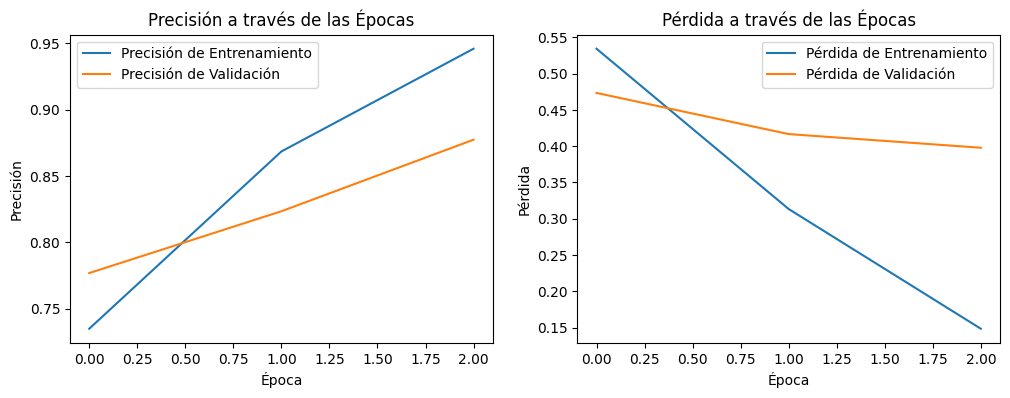

In [21]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification

# --- 1. Carga del Modelo Pre-entrenado ---
# Usamos el mismo checkpoint que para el tokenizador
checkpoint = "bert-base-uncased"

# Cargamos el modelo con una cabeza de clasificación.
# num_labels=2 le dice al modelo que nuestra tarea es una clasificación binaria (ej. Paráfrasis o No).
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

# --- 2. Compilación del Modelo ---
# Preparamos el modelo para el entrenamiento definiendo el optimizador, la función de pérdida y las métricas.

# Para el optimizador, es una buena práctica usar un learning rate bajo para el fine-tuning.
# AdamW es una variante de Adam que funciona muy bien con Transformers.
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

# La función de pérdida debe ser la adecuada para clasificación con etiquetas enteras.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Añadimos métricas para monitorear el rendimiento durante el entrenamiento.
metrics = ["accuracy"]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


# --- 3. Entrenamiento del Modelo (Fine-Tuning) ---
# Ahora usamos el método .fit() de Keras, pasándole los datasets que preparamos.

num_epochs = 3  # Un número típico de épocas para fine-tuning

# ¡La línea que inicia todo el proceso!
history = model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=num_epochs
)

# --- 4. (Opcional) Ver los resultados ---
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot de la precisión
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.title('Precisión a través de las Épocas')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Plot de la pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Pérdida a través de las Épocas')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

plot_history(history)


In [22]:
#sava model
model.save_pretrained("modelo_reentrenado")